In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import torch
from plotly import express as px
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("hate_crime.csv")
df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226323,1445214,2021,WY0150100,Cody,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Simple Assault,1.0,Residence/Home,Anti-Lesbian (Female),Individual,S,S
226324,1445630,2021,WY0070200,Riverton,NaN,City,WY,Wyoming,Mountain,West,...,Not Specified,Not Specified,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
226325,1448544,2021,WY0190100,Green River,NaN,City,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Government/Public Building,Anti-American Indian or Alaska Native,Individual,S,S
226326,1448545,2021,WY0150000,Park,NaN,County,WY,Wyoming,Mountain,West,...,White,Not Hispanic or Latino,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Mental Disability,Individual,S,S


In [3]:
df1 = df[df["state_abbr"] == "CA"]
df1

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
60,48,1991,CA0300900,Garden Grove,NaN,City,CA,California,Pacific,West,...,Unknown,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S
61,49,1991,CA0300900,Garden Grove,NaN,City,CA,California,Pacific,West,...,Unknown,Not Specified,1,Intimidation,1.0,Other/Unknown,Anti-Jewish,Individual,S,S
62,50,1991,CA0300900,Garden Grove,NaN,City,CA,California,Pacific,West,...,Unknown,Not Specified,1,Intimidation,1.0,Other/Unknown,Anti-Jewish,Individual,S,S
63,51,1991,CA0300900,Garden Grove,NaN,City,CA,California,Pacific,West,...,White,Not Specified,2,Aggravated Assault,2.0,Parking/Drop Lot/Garage,Anti-Asian,Individual,S,S
64,52,1991,CA0300900,Garden Grove,NaN,City,CA,California,Pacific,West,...,White,Not Specified,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219479,1448241,2021,CA0370000,San Diego,NaN,County,CA,California,Pacific,West,...,White,Hispanic or Latino,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
219480,1448513,2021,CA0370000,San Diego,NaN,County,CA,California,Pacific,West,...,White,Not Hispanic or Latino,2,Destruction/Damage/Vandalism of Property,2.0,Residence/Home,Anti-Asian,Individual,S,S
219481,1449026,2021,CA0370200,Chula Vista,NaN,City,CA,California,Pacific,West,...,Not Specified,Not Specified,1,Destruction/Damage/Vandalism of Property,0.0,School/College,Anti-Jewish,Business,S,S
219482,1449032,2021,CA0370000,San Diego,NaN,County,CA,California,Pacific,West,...,White,Not Hispanic or Latino,1,Destruction/Damage/Vandalism of Property,0.0,School/College,"Anti-Lesbian, Gay, Bisexual, or Transgender (M...",Government,S,S


In [4]:
df1['incident_date'] = pd.to_datetime(df1['incident_date'])
mask = (df1['incident_date'] >= '2020-03-11') & (df1['incident_date'] <= '2020-12-31')

# apply the mask to the dataframe
df2 = df1.loc[mask]

C:\Users\jim13\AppData\Local\Temp\ipykernel_35112\1820329626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['incident_date'] = pd.to_datetime(df1['incident_date'])


In [5]:
df2["offense_name"] = df2["offense_name"].replace("Destruction/Damage/Vandalism of Property", "Vandalism of Property")

C:\Users\jim13\AppData\Local\Temp\ipykernel_35112\2550608921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["offense_name"] = df2["offense_name"].replace("Destruction/Damage/Vandalism of Property", "Vandalism of Property")


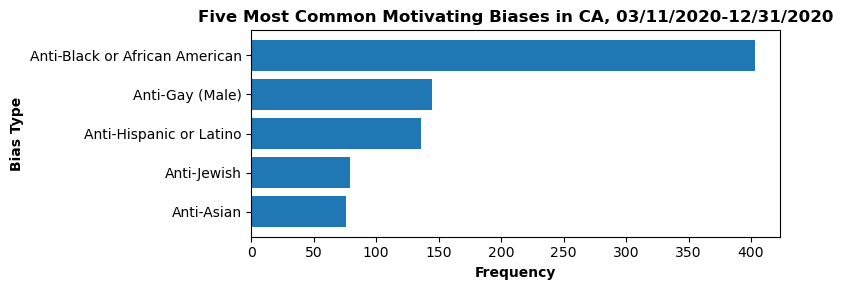

In [6]:
import matplotlib.pyplot as plt

# First Plot
plt.figure(figsize=(8, 3))

# Count the frequency of each term in the "bias_desc" column
counts = df2["bias_desc"].value_counts()[:5]

# Sort the counts in descending order
counts = counts.sort_values(ascending=True)

# Create the horizontal bar plot
plt.barh(counts.index, counts.values)

# Set the labels and title
plt.xlabel("Frequency", weight='bold')
plt.ylabel("Bias Type", weight='bold')
plt.title("Five Most Common Motivating Biases in CA, 03/11/2020-12/31/2020", weight='bold')

# Display the first plot
plt.tight_layout()

plt.savefig('bias_plot.png', dpi=300)
plt.show()

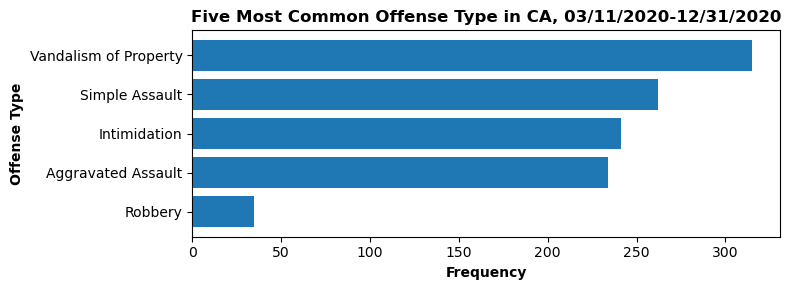

In [7]:
# Second Plot
plt.figure(figsize=(8, 3))

counts = df2["offense_name"].value_counts()[:5]

# Sort the counts in descending order
counts = counts.sort_values(ascending=True)

# Create the horizontal bar plot
plt.barh(counts.index, counts.values)

# Set the labels and title
plt.xlabel("Frequency", weight='bold')
plt.ylabel("Offense Type", weight='bold')
plt.title("Five Most Common Offense Type in CA, 03/11/2020-12/31/2020", weight='bold')

# Display the second plot
plt.tight_layout()
plt.savefig('offense_plot.png', dpi=300)
plt.show()